In [0]:
# call-in the dependencies
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
from keras import regularizers # this is what makes a sparse autoencoder

In [0]:
# preparing our data
data = mnist.load_data()
# we are concerned with images only not with labels
(x_train , _) , (x_test , _) = data

# normalization
x_train = x_train / 255.0
x_test = x_test / 255.0

# convert the images to a 784x1 vector using numpy
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [0]:
# lets make our Model autoencoder

encoded_dim = 32 # we have a 24.5 compression factor i.e. 784/32

# input layer
input_img = Input(shape = (784,))
# Other layers
encoded = Dense(encoded_dim , activation = 'relu', activity_regularizer=regularizers.l1(10e-5))(input_img) ## the only change is here with regularizers
decoded = Dense(784 , activation = 'sigmoid')(encoded)

# defining our model
autoencoder = Model(input_img , decoded)


In [0]:
# compiling our model and training

autoencoder.compile(loss = "binary_crossentropy" , optimizer = "adadelta")

autoencoder.fit(x_train , x_train,
                epochs = 100,
                batch_size = 256,
                shuffle = True,
                validation_data = (x_test,x_test))

60000/60000 [==============================] - 5s 85us/step - loss: 0.2848 - val_loss: 0.2846
Epoch 72/100
60000/60000 [==============================] - 5s 85us/step - loss: 0.2844 - val_loss: 0.2843
Epoch 73/100
60000/60000 [==============================] - 5s 82us/step - loss: 0.2841 - val_loss: 0.2839
Epoch 74/100
60000/60000 [==============================] - 5s 81us/step - loss: 0.2837 - val_loss: 0.2836
Epoch 75/100
60000/60000 [==============================] - 5s 82us/step - loss: 0.2834 - val_loss: 0.2832
Epoch 76/100
60000/60000 [==============================] - 5s 80us/step - loss: 0.2831 - val_loss: 0.2829
Epoch 77/100
60000/60000 [==============================] - 5s 80us/step - loss: 0.2828 - val_loss: 0.2826
Epoch 78/100
60000/60000 [==============================] - 5s 82us/step - loss: 0.2825 - val_loss: 0.2823
Epoch 79/100
60000/60000 [==============================] - 5s 83us/step - loss: 0.2822 - val_loss: 0.2820
Epoch 80/100
60000/60000 [========================

In [0]:
# now lets visualize the model by seperating the model into 2

encoded_model = Model(input_img , encoded)
encoded_input = Input(shape = (encoded_dim,))
decoded_layer = autoencoder.layers[-1]
decoded_model = Model(encoded_input , decoded_layer(encoded_input))

In [0]:
# lets predict the model we just made for further visualization
encoded_imgs = encoded_model.predict(x_test)
decoded_imgs = decoded_model.predict(encoded_imgs)

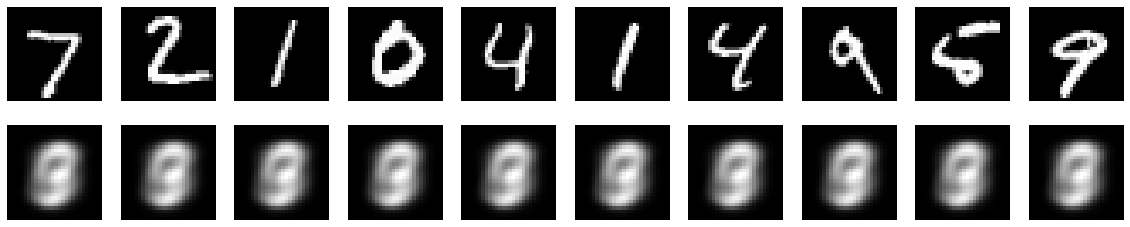

In [0]:
# we will now visualse the results and their accuracy
n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
change = encoded_imgs.mean() 
print(change)

3.0203826e-06


In [0]:
# so as you can see there is a change in the sparse Autoencoder with a less mean hence the results have become twice sparser this time.
# but still the results are not promising and not so improvment is there
# lets try something more internse say a deep network instead of a shallow one...